## 导入数据 

In [9]:
import pandas as pd
import numpy as np

In [10]:
pd.set_option('display.max_colwidth', 25)

## 分析listings 

In [11]:
listings = pd.read_csv("2019-03/listings.csv")

In [12]:
listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,49091,https://www.airbnb.co...,20190318042744,2019-03-18,COZICOMFORT LONG TERM...,NaN,This is Room No. 2.(a...,This is Room No. 2.(a...,none,NaN,...,f,f,flexible,t,t,2,0,2,0,0.02
1,50646,https://www.airbnb.co...,20190318042744,2019-03-18,Pleasant Room along B...,Fully furnished bedro...,"Good Condition room, ...",Fully furnished bedro...,none,The serenity & quiet ...,...,f,f,moderate,f,t,1,0,1,0,0.30
2,56334,https://www.airbnb.co...,20190318042744,2019-03-18,COZICOMFORT,NaN,This is Room no. 1. U...,This is Room no. 1. U...,none,NaN,...,f,f,flexible,t,t,2,0,2,0,0.21


In [13]:
listings.shape

(7975, 106)

### 1.文字描述

**这一部分所涉及的features有：**

In [24]:
listings.head(3).columns[1:19]

Index(['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url'],
      dtype='object')

**总结要删除的特征**

    'listing_url', 'scrape_id', 'last_scraped', 'summary', 'space', 'experiences_offered',

    'notes', 'transit', 'access', 'interaction', 'house_rules',

    'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url'


#### summary和description的处理 

In [6]:
listings.summary.isnull().value_counts()

False    7706
True      269
Name: summary, dtype: int64

In [7]:
listings.description.isnull().value_counts()

False    7814
True      161
Name: description, dtype: int64

In [8]:
listings[(listings.summary!=listings.description) & listings.summary.notnull()][['summary','description']].iloc[1000,:]

summary        As a tourist in the v...
description    As a tourist in the v...
Name: 1307, dtype: object

- summary和description两个特征都有一两百个缺失值，且summary就是截取description的一小部分内容。

- summary缺失值更多
    
- 所以我们准备只保留description。信息更多，方便我们做nlp分析

- 对于缺失值可能就直接删除样本了，因为缺失值很少，而且几乎都是空房没人住的房子。

#### space特征的处理 

In [11]:
listings.space.isnull().value_counts()

False    5799
True     2176
Name: space, dtype: int64

In [12]:
listings[(listings.space!=listings.description) & listings.space.notnull()][['space','description']].head(3)

,space,description
1,"Good Condition room, ...",Fully furnished bedro...
3,Landed Homestay Room ...,For 3 (Website hidden...
5,Vocational Stay Delux...,"Like your own home, 2..."


- space特征的缺失值较多，达到25%
- 内容就是截取自description中的部分
- 建议直接舍弃，只保留description特征

#### experiences_offered特征 

In [65]:
listings.experiences_offered.value_counts()

none    7975
Name: experiences_offered, dtype: int64

目前看来这个特征没有作用，因为所有的值都是none。需要查看后期的数据有没有不同。

#### neighborhood_overview特征 

In [71]:
listings.neighborhood_overview.isnull().value_counts()

False    4741
True     3234
Name: neighborhood_overview, dtype: int64

缺失值很多，但是这个特征比较重要。如何处理需要进一步思考。

In [91]:
listings[(listings.description!=listings.neighborhood_overview) & listings.neighborhood_overview.notnull()][['neighborhood_overview','description']].head(10)

,neighborhood_overview,description
1,"The serenity & quiet surrounding makes it an ideal place to come back to after work / play. Lovely birds chirping for a nice morning wake up (if you leave the windows open) are a pleasure to wake up to. Located on the main road but at just a short walk in makes it an ideal neighbourhood with excellent transport facilities & food, supermarket, etc, all as required for a convenient living.","Fully furnished bedroom with a nice view on the 10th floor of a newly built private condominium on one of the most preferred residential estates in Singapore. Good Condition room, bright & windy. Comes with TV, Aircon, Bed, wardrobe. Can accommodate couples or 2 ladies or students for long-term rental only. Kitchen, washing facilities, gym, swimming pool, etc. We love to host people & have the opportunity to learn & enjoy the various culture & languages around the world. We hope to part as friends after your stay! The serenity & quiet surrounding makes it an ideal place to come back to after work / play. Lovely birds chirping for a nice morning wake up (if you leave the windows open) are a pleasure to wake up to. Located on the main road but at just a short walk in makes it an ideal neighbourhood with excellent transport facilities & food, supermarket, etc, all as required for a convenient living. Less than 400m from the apartment is the main road which connects to the city center &"
5,Quiet and view of the playground with exercise tracks with access to neighbourhood Simwi Estate.,"Like your own home, 24hrs access. Vocational Stay Deluxe Bedroom in Singapore.(Near Airport ,EXPO,SIA training centre) Located Between - Simei and Expo Mrt (changi business district park) - 2 bustop distance or 10-15min walking distant to Simei MRT. - Bus (phone number hidden) Services provided - Daily Cleaning of Room - Free Usage of Ironing and Washing Machine (Detergent is not provided) - Laundry (Additional Charges) - Dryer (Additional Charges) - Change of towels, toiletries & change of bedding for extended stay. Neighbourhood Consists of -A residential area -Neighbourhood Schools -East Point Shopping Mall -Tampines Business & Shopping District (Tampines Mall, Tampines 1 & Century Square) -Tampines Block 201, Housing Estate (Singaporean Cultural Spot) -Changi Simei Community Centre ~ Gym (S$3.50 per entry) ~ Badminton Court (S$3 per hour) -Neighbourhood Basketball Court -Jogging Track -At least 5 Food Courts/Coffee Shop in vicinity of 5-15 mins walk ~"
6,"Clean ,quiet & safe environment. A playground with exercise equipment and running track link to all park connector in Singapore.","Vocational Stay Family Suite/Jumbo Bedroom with balcony in Singapore.(Near Airport & Expo) (This room can accomodate 6 single individual bed and 1 Queensize bed (total 8 pax).There are 2 Aircon in this (Website hidden by Airbnb) allow 8 pax including children. Note: The height is lower as this is a roof attic Big and spacious ,private floor with family hall to yourself if book both together.(jumbo room & family hall) Smoker can smoke at the balcony.Please note the ceiling is lower as this is a roof attic. 24 hrs Door Access. If I am around feel free to ask me for Advise. Clean ,quiet & safe environment. A playground with exercise equipment and running track link to all park connector in Singapore. Bus 24 go to Airport or tanah merah mrt.Bus 9 to Simei .mrt. Nearby shopping centres Tampines,simei & expo. Incase there is some changes in the rooms allocated ,alternate room will be replaced"
7,"Emerald hill is the historic area right in the centre of Orchard road. It is the only conservative area around here and the neighbourhood is very charming, only shophouses and beautiful architecture. Not surprisingly, people oftens come to take picture around my neighbourhood for wedding or photo shoot. Emerald hill has strong Paranakan (old Chinese merchant residential area) heritage and it reflects in every corners when you walk around the neighbourhood. 

In [104]:
listings[(listings.description.str.contains("输入需要查询的句子")) & listings.neighborhood_overview.notnull()][['neighborhood_overview','description']].head(10)

,neighborhood_overview,description


- 缺失值很多，有三千多

- 某些店家的neighbourhood_overview是从description摘抄来的，但还有部分是不在description中的，有一定的信息价值

#### notes, transit, access特征

In [28]:
listings.notes.isnull().value_counts()

False    4433
True     3542
Name: notes, dtype: int64

In [29]:
listings.transit.isnull().value_counts()

False    4759
True     3216
Name: transit, dtype: int64

In [30]:
listings.access.isnull().value_counts()

False    5155
True     2820
Name: access, dtype: int64

#### 分析剩下的features 

In [22]:
listings.head(3).columns[1:20]

Index(['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_id'],
      dtype='object')

### 2.房东相关的特征 

**总结要删除的特征**

    'host_url','host_name','host_location',

    'host_acceptance_rate',

    'host_thumbnail_url','host_picture_url','host_total_listings_count'

**原因**

    host_url,host_name为host的个人页面的网址与名字，意义不大。可丢弃，因host_id就可用来identify hosts
    host_location可丢弃，基本全为新加坡。
    host_acceptance_rate 全部为null value; 可丢弃；
    host_thumbnail_url网址均已失效；可丢弃；
    host_picture。不做图像分析 可丢弃。
    host_listings_count & host_total_listings_count#两者完全一样 取其一即可：取host_listings_count
    host_is_superhost 在该dataset里全部为non-superhost;原本可丢弃， 但其他dataset里有部分true value，可先留着；

**注意**

    可以考虑分析Host本人不在新加坡的情况


    

In [17]:
listings[['host_id', 'host_url','host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count','host_verifications',
       'host_has_profile_pic', 'host_identity_verified']]

,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified
0,266763,https://www.airbnb.co...,Francesca,2010-10-20,singapore,I am a private tutor ...,within a few hours,100%,NaN,f,https://a0.muscache.c...,https://a0.muscache.c...,Woodlands,2,2,"['email', 'phone', 'f...",t,f
1,227796,https://www.airbnb.co...,Sujatha,2010-09-08,"Singapore, Singapore",I am a working profes...,NaN,NaN,NaN,f,https://a0.muscache.c...,https://a0.muscache.c...,Bukit Timah,1,1,"['email', 'phone', 'f...",t,f
2,266763,https://www.airbnb.co...,Francesca,2010-10-20,singapore,I am a private tutor ...,within a few hours,100%,NaN,f,https://a0.muscache.c...,https://a0.muscache.c...,Woodlands,2,2,"['email', 'phone', 'f...",t,f
3,367042,https://www.airbnb.co...,Belinda,2011-01-29,Singapore,Hi My name is Belinda...,within an hour,100%,NaN,f,https://a0.muscache.c...,https://a0.muscache.c...,Tampines,9,9,"['email', 'phone', 'r...",t,t
4,367042,https://www.airbnb.co...,Belinda,2011-01-29,Singapore,Hi My name is Belinda...,within an hour,100%,NaN,f,https://a0.muscache.c...,https://a0.muscache.c...,Tampines,9,9,"['email', 'phone', 'r...",t,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7970,248196938,https://www.airbnb.co...,Mr. J,2019-03-11,Singapore,NaN,NaN,NaN,NaN,f,https://a0.muscache.c...,https://a0.muscache.c...,Kallang,14,14,"['phone', 'offline_go...",t,f
7971,103283641,https://www.airbnb.co...,상완,2016-11-10,"Seoul, South Korea",NaN,NaN,NaN,NaN,f,https://a0.muscache.c...,https://a0.muscache.c...,NaN,1,1,"['email', 'phone', 'f...",t,f
7972,97878860,https://www.airbnb.co...,Chelsey,2016-10-04,SG,We rent rooms on beha...,within an hour,100%,NaN,f,https://a0.muscache.c...,https://a0.muscache.c...,Kallang,56,56,"['email', 'phone', 'r...",t,t
7973,248361661,https://www.airbnb.co...,Singapore,2019-03-12,SG,NaN,NaN,NaN,NaN,f,https://a0.muscache.c...,https://a0.muscache.c...,Bukit Merah,79,79,"['phone', 'jumio', 'o...",t,f


In [26]:
listings.host_verifications[0]

"['email', 'phone', 'facebook', 'reviews', 'jumio', 'offline_government_id', 'selfie', 'government_id', 'identity_manual']"

In [21]:
listings.host_identity_verified.value_counts()

f    5955
t    2020
Name: host_identity_verified, dtype: int64

- 思考一下：host_listings_count以及calculated_host_listings_count的含义与区别

- host-verification需要处理成array类型，并且弄清楚含义

- host_identity_verified的含义

In [126]:
listings[(listings.description.str.contains("Rate based on 12 hours of ")) & listings.description.notnull()][['notes','description']].head(10)

,notes,description


### 3.地理位置及周边环境

**总结要删除的特征**

    'street','neighbourhood','city','state', 'market','smart_location', 'country_code', 'country'
    

**注意**

    zipcode有少量的空值


In [139]:
listings[['street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact']]

,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact
0,"Singapore, Singapore",Woodlands,Woodlands,North Region,Singapore,NaN,730702,Singapore,Singapore,SG,Singapore,1.44255,103.79580,t
1,"Singapore, Singapore",Bukit Timah,Bukit Timah,Central Region,Singapore,NaN,589664,Singapore,Singapore,SG,Singapore,1.33235,103.78521,t
2,"Singapore, Singapore",Woodlands,Woodlands,North Region,Singapore,NaN,NaN,Singapore,Singapore,SG,Singapore,1.44246,103.79667,t
3,"Singapore, Singapore",Tampines,Tampines,East Region,Singapore,NaN,488405,Singapore,Singapore,SG,Singapore,1.34541,103.95712,t
4,"Singapore, Singapore",Tampines,Tampines,East Region,Singapore,NaN,488405,Singapore,Singapore,SG,Singapore,1.34567,103.95963,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7970,"Singapore, Singapore",Kallang,Kallang,Central Region,Singapore,NaN,339842,Singapore,Singapore,SG,Singapore,1.32388,103.86456,t
7971,"Singapore, Singapore",Little India,Rochor,Central Region,Singapore,NaN,218745,Singapore,Singapore,SG,Singapore,1.30968,103.85178,f
7972,"Singapore, Singapore",Bukit Merah,Bukit Merah,Central Region,Singapore,NaN,160055,Singapore,Singapore,SG,Singapore,1.28546,103.83469,t
7973,"Singapore, Singapore",Novena,Novena,Central Region,Singapore,NaN,329924,Singapore,Singapore,SG,Singapore,1.32441,103.85253,t


In [49]:
listings.city.value_counts().head(3)

Singapore     7820
Singapore       16
Whampoa          5
Name: city, dtype: int64

In [50]:
listings.street.value_counts().head(3)

Singapore, Singapore               7111
Singapore, Singapore, Singapore     575
SG, Singapore                        51
Name: street, dtype: int64

In [53]:
listings.zipcode.isnull().value_counts()

False    7116
True      859
Name: zipcode, dtype: int64

### 4.房屋细节

**总结要删除的特征**

    square_feet

In [66]:
housing = listings[['property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet']]

In [60]:
listings.amenities.value_counts().head(2)

{Wifi,"Air conditioning",Pool,Kitchen,"Pets allowed",Elevator,Heating,Washer,Dryer,"Smoke detector","Carbon monoxide detector","First aid kit","Fire extinguisher",Essentials,Shampoo,"Lock on bedroom door",Hangers,"Hair dryer",Iron,"Laptop friendly workspace"}                                                  68
{TV,Wifi,"Air conditioning",Pool,Kitchen,"Paid parking off premises","Smoking allowed","Pets allowed",Gym,Elevator,"Family/kid friendly",Washer,Dryer,Essentials,Shampoo,Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Hot water","Luggage dropoff allowed","Long term stays allowed","Host greets you"}    60
Name: amenities, dtype: int64

In [67]:
listings.property_type.value_counts().head()

Apartment             3400
Condominium           1873
Serviced apartment    1104
House                  461
Hostel                 294
Name: property_type, dtype: int64

In [69]:
listings.beds.value_counts()

1.0     4537
2.0     1815
3.0      739
4.0      391
5.0      125
6.0      115
16.0      53
8.0       48
10.0      35
12.0      30
7.0       28
14.0      11
9.0        9
18.0       8
30.0       7
15.0       4
13.0       3
36.0       2
Name: beds, dtype: int64

In [68]:
housing.describe()
# square_feet?
# need to filter? the one with 16 rooms 21 bathrooms and 36 beds?

,accommodates,bathrooms,bedrooms,beds,square_feet
count,7975.000000,7969.000000,7969.000000,7960.000000,46.000000
mean,3.449655,1.514054,1.313214,2.030276,156.500000
std,2.638763,1.095349,0.953238,2.263175,253.975917
min,1.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,1.000000,1.000000,0.000000
75%,4.000000,2.000000,2.000000,2.000000,205.000000
max,16.000000,21.000000,10.000000,36.000000,1001.000000


- 思考ammenities这个特征要怎么处理 能否将类别减少

- beds的数量outliers需要核实一下 # need to filter? the one with 16 rooms 21 bathrooms and 36 beds?

- property_type我们把那些少有的房屋类型删去或放在others中

### 5.价格 

**要删除的特征**

    'weekly_price', 'monthly_price'  不到10%有数据,可丢弃

In [141]:
listings[['price', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee']]

,price,weekly_price,monthly_price,security_deposit,cleaning_fee
0,$81.00,NaN,"$1,014.00",NaN,NaN
1,$80.00,$400.00,"$1,600.00",NaN,NaN
2,$68.00,NaN,$947.00,NaN,NaN
3,$200.00,NaN,"$5,410.00",$271.00,$54.00
4,$92.00,$676.00,"$2,435.00",$135.00,$27.00
...,...,...,...,...,...
7970,$360.00,NaN,NaN,$300.00,$150.00
7971,$24.00,NaN,NaN,NaN,NaN
7972,$57.00,NaN,NaN,$0.00,$15.00
7973,$100.00,NaN,NaN,$300.00,$20.00


In [233]:
listings.weekly_price.isnull().value_counts()

True     7354
False     621
Name: weekly_price, dtype: int64

In [27]:
listings.cleaning_fee.isnull().value_counts()

False    5675
True     2300
Name: cleaning_fee, dtype: int64

- weekly price 和 monthly_price大量缺失值，直接舍弃

- 有要求cleaning_fee的都要求security_deposit 二者一般同时出现 但这两个缺失值2000多个

### 6.预定要求 

In [146]:
listings[['guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm']]

,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm
0,1,$14.00,180,360,180,180,360,360,180.0,360.0
1,2,$20.00,90,730,90,90,730,730,90.0,730.0
2,1,$14.00,6,14,6,6,14,14,6.0,14.0
3,4,$27.00,1,1125,1,1,1125,1125,1.0,1125.0
4,1,$20.00,1,1125,1,1,1125,1125,1.0,1125.0
...,...,...,...,...,...,...,...,...,...,...
7970,7,$29.00,2,180,2,2,180,180,2.0,180.0
7971,1,$0.00,1,1125,1,1,1125,1125,1.0,1125.0
7972,1,$10.00,18,1125,18,18,1125,1125,18.0,1125.0
7973,2,$20.00,1,1125,1,1,1125,1125,1.0,1125.0


### 7.可预订日期 

**总结要删除的特征**

    'calendar_last_scraped',has_availability  因为无用信息和全都是true

In [149]:
listings[['calendar_updated', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'calendar_last_scraped']]

,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped
0,58 months ago,t,30,60,90,365,2019-03-18
1,55 months ago,t,30,60,90,365,2019-03-18
2,52 months ago,t,30,60,90,365,2019-03-18
3,today,t,27,52,82,357,2019-03-18
4,a week ago,t,27,51,81,356,2019-03-18
...,...,...,...,...,...,...,...
7970,today,t,28,58,88,268,2019-03-18
7971,today,t,7,7,8,8,2019-03-18
7972,today,t,13,43,73,348,2019-03-18
7973,today,t,29,43,43,59,2019-03-18


In [38]:
listings.calendar_updated.value_counts()

today            2432
3 days ago        560
a week ago        482
2 weeks ago       411
3 months ago      278
                 ... 
62 months ago       1
61 months ago       1
50 months ago       1
77 months ago       1
54 months ago       1
Name: calendar_updated, Length: 77, dtype: int64

- 处理一下availability_30_60_90_365整合成(0,1)

- 思考如何分析host的调整频率，是否是长期活跃用户 calendar_updated 根据这一列考虑分组 判断host的活跃度

- 对于很久没更新的host，这种房子的信息也是不准确的，一定时间以上的就过滤掉了

- 再确认一下这个calendar_updated到底是update了啥

### 8.评价

**总结要删除的特征**

    'first_review','last_review'

    first_review, last_review是该房源第一条评论和最后一条评论的时间，对我们意义不大。且将近40%为null.可丢弃
    
    但需要注意的是，很多房间是没有review score的

In [165]:
listings[['number_of_reviews', 'number_of_reviews_ltm',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value','reviews_per_month']]

,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,1,0,2013-10-21,2013-10-21,94.0,10.0,10.0,10.0,10.0,8.0,8.0,0.02
1,18,0,2014-04-18,2014-12-26,91.0,9.0,10.0,10.0,10.0,9.0,9.0,0.30
2,20,0,2011-06-25,2015-10-01,98.0,10.0,10.0,10.0,10.0,8.0,9.0,0.21
3,12,2,2011-12-19,2019-01-06,80.0,8.0,8.0,9.0,9.0,8.0,8.0,0.14
4,20,0,2011-07-30,2017-08-13,80.0,8.0,8.0,9.0,9.0,8.0,8.0,0.22
...,...,...,...,...,...,...,...,...,...,...,...,...
7970,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7971,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7972,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7973,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
listings[['number_of_reviews']].value_counts()

number_of_reviews
0                    3051
1                     949
2                     555
3                     381
4                     249
                     ... 
169                     1
173                     1
175                     1
176                     1
290                     1
Length: 195, dtype: int64

### 9.对顾客的要求 

**总结要删除的特征**

    'requires_license', 'license', 'jurisdiction_names','is_business_travel_ready' 缺失值太多或全为同一个值

In [154]:
listings[['requires_license', 'license', 'jurisdiction_names', 'instant_bookable',
       'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification']]

,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,f,NaN,NaN,f,f,flexible,t,t
1,f,NaN,NaN,f,f,moderate,f,t
2,f,NaN,NaN,f,f,flexible,t,t
3,f,NaN,NaN,t,f,moderate,f,t
4,f,NaN,NaN,t,f,moderate,f,t
...,...,...,...,...,...,...,...,...
7970,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f
7971,f,NaN,NaN,t,f,flexible,f,f
7972,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f
7973,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f


In [155]:
listings.requires_license.value_counts()

f    7975
Name: requires_license, dtype: int64

In [70]:
listings.is_business_travel_ready.value_counts()

f    7975
Name: is_business_travel_ready, dtype: int64

In [71]:
listings.cancellation_policy.value_counts()

strict_14_with_grace_period    4978
flexible                       1770
moderate                       1189
super_strict_30                  31
super_strict_60                   6
strict                            1
Name: cancellation_policy, dtype: int64

In [76]:
listings[['require_guest_phone_verification']].value_counts()

require_guest_phone_verification
f                                   7894
t                                     81
dtype: int64

### 10.房主所拥有的房屋数量及类型 

**总结要删除的特征**

    'calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms',
    'calculated_host_listings_count_shared_rooms'

In [158]:
listings[['calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms']]

,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2,0,2,0
1,1,0,1,0
2,2,0,2,0
3,9,0,9,0
4,9,0,9,0
...,...,...,...,...
7970,14,14,0,0
7971,1,0,1,0
7972,56,0,56,0
7973,79,32,47,0


- 只保留第一列即可，房东有多少房间

## 分析calendars 

In [41]:
calendar = pd.read_csv("2019-03/calendar.csv")

In [42]:
calendar.shape

(2910526, 7)

In [43]:
calendar.head(10)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,49091,2019-03-18,t,$81.00,$81.00,180.0,360.0
1,49091,2019-03-19,t,$81.00,$81.00,180.0,360.0
2,49091,2019-03-20,t,$81.00,$81.00,180.0,360.0
3,49091,2019-03-21,t,$81.00,$81.00,180.0,360.0
4,49091,2019-03-22,t,$81.00,$81.00,180.0,360.0
5,49091,2019-03-23,t,$81.00,$81.00,180.0,360.0
6,49091,2019-03-24,t,$81.00,$81.00,180.0,360.0
7,49091,2019-03-25,t,$81.00,$81.00,180.0,360.0
8,49091,2019-03-26,t,$81.00,$81.00,180.0,360.0
9,49091,2019-03-27,t,$81.00,$81.00,180.0,360.0


In [44]:
calendar.available.value_counts()

t    1738415
f    1172111
Name: available, dtype: int64

In [209]:
calendar[calendar.minimum_nights<=7].pivot_table(calendar,index=['listing_id'])

,maximum_nights,minimum_nights
listing_id,,
56334,14.0,6.000000
71609,1125.0,1.000000
71896,1125.0,1.000000
71903,1125.0,1.000000
71907,365.0,1.000000
...,...,...
33112624,180.0,2.000000
33112676,180.0,2.000000
33118503,1125.0,1.000000


In [187]:
calendar.minimum_nights.value_counts()

1.0      870411
2.0      485129
3.0      421795
7.0      177494
5.0      161400
          ...  
35.0        365
48.0        365
500.0       365
11.0        261
59.0        261
Name: minimum_nights, Length: 70, dtype: int64

In [178]:
import matplotlib.pyplot as plt

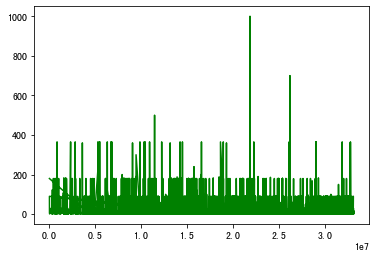

In [184]:
plt.plot(calendar.listing_id, calendar.minimum_nights,'g')

In [192]:
pd.pivot_table(calendar,index=['listing_id'])

,maximum_nights,minimum_nights
listing_id,,
49091,360.0,180.000000
50646,730.0,90.000000
56334,14.0,6.000000
71609,1125.0,1.000000
71896,1125.0,1.000000
...,...,...
33112676,180.0,2.000000
33118503,1125.0,1.000000
33119907,1125.0,18.000000


- 有几百万行数据，因为每一个房子会有将近一年的记录，所以数据特别多

- 但是特征几乎不会变化，价格和至少居住的天数几乎稳定不变。重复数据极多

- 里面的数据和listings表中有重合

- 我们发现minimum nights<=7的房子是绝大多数，但有极个别的房子要求长租，甚至达到180天

- 这张表几乎没有价值

## 分析neighbourhoods

In [185]:
neighbour = pd.read_csv("2019-03/neighbourhoods.csv")

In [218]:
neighbour.head(30)

,neighbourhood_group,neighbourhood
0,Central Region,Bishan
1,Central Region,Bukit Merah
2,Central Region,Bukit Timah
3,Central Region,Downtown Core
4,Central Region,Geylang
5,Central Region,Kallang
6,Central Region,Marina East
7,Central Region,Marina South
8,Central Region,Marine Parade
9,Central Region,Museum


In [215]:
neighbour.shape

(55, 2)

In [213]:
neighbour.neighbourhood_group.value_counts()

Central Region       22
West Region          12
North Region          8
North-East Region     7
East Region           6
Name: neighbourhood_group, dtype: int64

- 给我们介绍新加坡各个地区里面有哪些景点

- 没什么太大价值

## 分析reviews

In [219]:
reviews = pd.read_csv("2019-03/reviews.csv")

In [221]:
reviews.head(100)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,49091,8243238,2013-10-21,8557223,Jared,Fran was absolutely g...
1,50646,11909864,2014-04-18,1356099,James,A comfortable room in...
2,50646,13823948,2014-06-05,15222393,Welli,Stayed over at Sujath...
3,50646,15117222,2014-07-02,5543172,Cyril,It's been a lovely st...
4,50646,15426462,2014-07-08,817532,Jake,We had a great experi...
...,...,...,...,...,...,...
95,71903,191550859,2017-09-08,92184943,Patrick,Thank you very much f...
96,71903,239024999,2018-02-28,156732905,현석,집이 넓었고 호스트분이 친절하였음. 그...
97,71903,267542293,2018-05-22,138864618,琏,"我是帮朋友定的民宿,她们住得很开心,都说很..."
98,71903,283430516,2018-06-30,29987759,Sven,I liked staying there...


In [222]:
reviews.shape

(98054, 6)

In [229]:
pd.pivot_table(reviews,index=['listing_id'])

,id,reviewer_id
listing_id,,
49091,8.243238e+06,8.557223e+06
50646,1.743057e+07,1.296743e+07
56334,1.020190e+07,7.775296e+06
71609,6.963639e+07,3.172309e+07
71896,2.560190e+07,1.824623e+07
...,...,...
32887470,4.237377e+08,1.331991e+07
32919985,4.233916e+08,1.233853e+07
32947749,4.241398e+08,6.332594e+07


- 这张表非常重要，能探索的东西非常多

- 探索点1：每个房子有多少comments，以及sentimental analysis，根据listing中的平均reviews评分判定好坏（5种程度）

- 探索点2：分析comments中的关键词

- 探索点3：随着时间的变化，所有评论的数量的变化（对新加坡爱彼迎整体分析）

- 探索点4：用户的平均评论次数

- 这个表格似乎是累积评论，我们可以考虑只看最新一期的reviews.csv